<a href="https://colab.research.google.com/github/RogMaverick18/ML-Lab-assignments/blob/main/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)  Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data
and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following
activities.
• What is the dimensionality of the vector space for this data?
• How many vectors exist in this vector space?
• What is the rank of Matrix A?
• Using Pseudo-Inverse find the cost of each product available for sale.  
(Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a
pseudo-inverse.)

In [ ]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

file_path = '/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx'

purchase_data = pd.read_excel(file_path, sheet_name='Purchase data')

purchase_data = purchase_data.loc[:, ~purchase_data.columns.str.contains('^Unnamed')]

purchase_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']] = (
    purchase_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']]
    .apply(pd.to_numeric, errors='coerce')
    .dropna()
)

# Creating Matrix A and Vector C
A = purchase_data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
C = purchase_data['Payment (Rs)'].values

print("Matrix A:")
print(A)
print("Vector C:")
print(C)

# Dimensionality and Vector Count
dimensionality = A.shape[1]
print(f"Dimensionality of the vector space: {dimensionality}")

num_vectors = A.shape[0]
print(f"Number of vectors in the vector space: {num_vectors}")

# Rank of Matrix A
rank_A = np.linalg.matrix_rank(A)
print(f"Rank of Matrix A: {rank_A}")

# Pseudo-Inverse to find costs
A_pseudo_inv = np.linalg.pinv(A)
X = np.dot(A_pseudo_inv, C)

print("Cost of each product (Candy, Mango, Milk):")
print(X)

print(f"Candy Price: Rs {X[0]:.2f}")
print(f"Mango Price per Kg: Rs {X[1]:.2f}")
print(f"Milk Packet Price: Rs {X[2]:.2f}")

Mounted at /content/drive
Matrix A:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Vector C:
[386 289 393 110 280 167 271 274 148 198]
Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3
Cost of each product (Candy, Mango, Milk):
[ 1. 55. 18.]
Candy Price: Rs 1.00
Mango Price per Kg: Rs 55.00
Milk Packet Price: Rs 18.00


2)  Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
available with the vendor.

In [ ]:
print("Cost of each product (Model Vector X):")
print(X)

C_predicted = np.dot(A, X)
print("\nActual Costs (C):", C)
print("Predicted Costs (C_predicted):", C_predicted)

Cost of each product (Model Vector X):
[ 1. 55. 18.]

Actual Costs (C): [386 289 393 110 280 167 271 274 148 198]
Predicted Costs (C_predicted): [386. 289. 393. 110. 280. 167. 271. 274. 148. 198.]


3) Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
purchase behavior.

In [ ]:
purchase_data["Category"] = np.where(purchase_data["Payment (Rs)"] > 200, "RICH", "POOR")
print("\nCustomer Categories:")
print(purchase_data[["Customer", "Payment (Rs)", "Category"]])


Customer Categories:
  Customer  Payment (Rs) Category
0      C_1           386     RICH
1      C_2           289     RICH
2      C_3           393     RICH
3      C_4           110     POOR
4      C_5           280     RICH
5      C_6           167     POOR
6      C_7           271     RICH
7      C_8           274     RICH
8      C_9           148     POOR
9     C_10           198     POOR


4) Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the
following after loading the data to your programming platform.
• Calculate the mean and variance of the Price data present in column D.  
(Suggestion: if you use Python, you may use statistics.mean() &
statistics.variance() methods).
• Select the price data for all Wednesdays and calculate the sample mean. Compare the mean
with the population mean and note your observations.
• Select the price data for the month of Apr and calculate the sample mean. Compare the
mean with the population mean and note your observations.
• From the Chg% (available in column I) find the probability of making a loss over the stock.
(Suggestion: use lambda function to find negative values)
• Calculate the probability of making a profit on Wednesday.
• Calculate the conditional probability of making profit, given that today is Wednesday.
• Make a scatter plot of Chg% data against the day of the week


Mean of Price data: 1560.66
Variance of Price data: 58732.37

Sample Mean for Wednesdays: 1550.71
Population mean: 1560.66
Difference from Population Mean: 9.96

Sample Mean for April: 1698.95
Population mean: 1560.66
Difference from Population Mean: 138.29

Probability of Making a Loss: 0.50

Probability of Making a Profit on Wednesday: 0.42

Conditional probability of making a profit given that today is Wednesday: 0.84


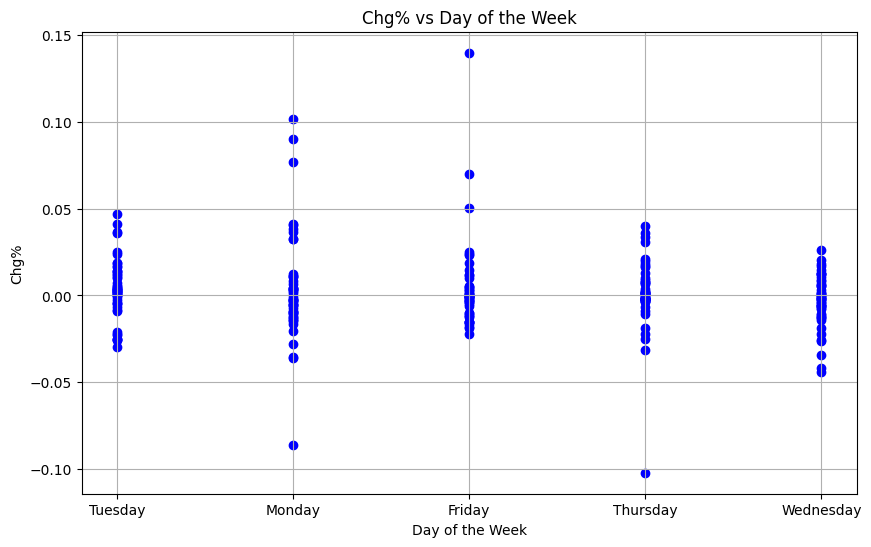

In [ ]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx'
stock_data = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

stock_data = stock_data.loc[:, ~stock_data.columns.str.contains('^Unnamed')]

stock_data['Price'] = pd.to_numeric(stock_data['Price'], errors='coerce')
stock_data['Chg%'] = pd.to_numeric(stock_data['Chg%'], errors='coerce')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.dropna(subset=['Price', 'Chg%'], inplace=True)
stock_data['Day'] = stock_data['Date'].dt.day_name()

# Q1: Mean and Variance of Price data
population_mean = stats.mean(stock_data['Price'])
population_variance = stats.variance(stock_data['Price'])
print(f"\nMean of Price data: {population_mean:.2f}")
print(f"Variance of Price data: {population_variance:.2f}")

# Q2: Sample mean for Wednesdays
wednesday_prices = stock_data[stock_data['Day'] == 'Wednesday']['Price']
wednesday_mean = stats.mean(wednesday_prices)
print(f"\nSample Mean for Wednesdays: {wednesday_mean:.2f}")
print(f"Population mean: {population_mean:.2f}")
print(f"Difference from Population Mean: {abs(population_mean - wednesday_mean):.2f}")

# Q3: Sample mean for April
april_prices = stock_data[stock_data['Date'].dt.month == 4]['Price']
april_mean = stats.mean(april_prices)
print(f"\nSample Mean for April: {april_mean:.2f}")
print(f"Population mean: {population_mean:.2f}")
print(f"Difference from Population Mean: {abs(population_mean - april_mean):.2f}")

# Q4: Probability of making a loss
num_days = len(stock_data)
loss_days = len(list(filter(lambda x: x < 0, stock_data['Chg%'])))
prob_loss = loss_days / num_days
print(f"\nProbability of Making a Loss: {prob_loss:.2f}")

# Q5: Probability of making a profit on Wednesday
wednesday_data = stock_data[stock_data['Day'] == 'Wednesday']
profit_wed = len(list(filter(lambda x: x > 0, wednesday_data['Chg%'])))
prob_profit_wed = profit_wed / len(wednesday_data)
print(f"\nProbability of Making a Profit on Wednesday: {prob_profit_wed:.2f}")

# Q6: Conditional probability of making a profit given that today is Wednesday
num_profit = len(list(filter(lambda x: x > 0, stock_data['Chg%'])))
prob_profit = num_profit / num_days
conditional_prob = prob_profit_wed / prob_profit
print(f"\nConditional probability of making a profit given that today is Wednesday: {conditional_prob:.2f}")

# Q7: Scatter plot of Chg% vs Day of the Week
plt.figure(figsize=(10,6))
plt.scatter(stock_data['Day'], stock_data['Chg%'], color='blue')
plt.title('Chg% vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.grid(True)
plt.show()

5)  Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the
following tasks:
• Study each attribute and associated values present. Identify the datatype (nominal etc.)
for the attribute.
• For categorical attributes, identify the encoding scheme to be employed. (Guidance:
employ label encoding for ordinal variables while One-Hot encoding may be employed
for nominal variables).
• Study the data range for numeric variables.
• Study the presence of missing values in each attribute.
• Study presence of outliers in data.  
• For numeric variables, calculate the mean and variance (or standard deviation).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

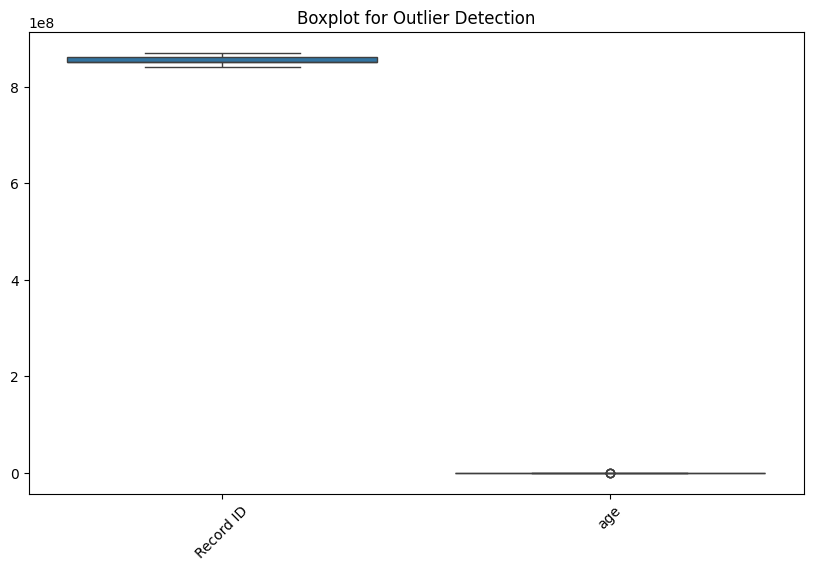

Mean of Numeric Variables:
Record ID    8.529473e+08
age          7.355582e+01
dtype: float64

Variance of Numeric Variables:
Record ID    5.748625e+13
age          1.401801e+06
dtype: float64

Standard Deviation of Numeric Variables:
Record ID    7.581969e+06
age          1.183977e+03
dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx'
df=pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

print(df.info())
print(df.head())
print(df.dtypes)

categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Attributes:", categorical_cols)

# label encoding for ordinal data
from sklearn.preprocessing import LabelEncoder
refSrc_order = {"other": 0, "SVI": 1, "SVHC": 2, "SVHD": 3,"STMW": 4}
df["referral source"] = df["referral source"].map(refSrc_order)
print(df.head(15))

# OHE for nominal data
nominal_cols = [col for col in categorical_cols if col not in refSrc_order]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
print(df.head())

# range
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
print("Range of Numeric Variables:")
print(numeric_cols.agg(['min', 'max']))
# check row = 8107

# missing values
print(df.isnull().sum())

print("outlier detection: ")
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

#  Calculate Mean & Variance (or Standard Deviation)
print("Mean of Numeric Variables:")
print(numeric_cols.mean())

print("\nVariance of Numeric Variables:")
print(numeric_cols.var())

print("\nStandard Deviation of Numeric Variables:")
print(numeric_cols.std())

6)  Data Imputation: employ appropriate central tendencies to fill the missing values in the data
variables. Employ following guidance.

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
Series([], dtype: int64)


In [ ]:
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].count() > 0

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_cols = [col for col in numeric_cols if has_outliers(df[col].dropna())]

print("Numeric Columns with Outliers:", outlier_cols)
print("Numeric Columns without Outliers:", list(set(numeric_cols) - set(outlier_cols)))

Numeric Columns with Outliers: ['age']
Numeric Columns without Outliers: ['Record ID']


In [ ]:
for col in set(numeric_cols) - set(outlier_cols):
    df[col].fillna(df[col].mean(), inplace=True)

for col in outlier_cols:
    df[col].fillna(df[col].median(), inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
Record ID         0
age               0
sex_F             0
sex_M             0
on thyroxine_t    0
                 ..
Condition_OI      0
Condition_P       0
Condition_Q       0
Condition_R       0
Condition_S       0
Length: 1365, dtype: int64


<ipython-input-15-81c3e345fb99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-15-81c3e345fb99>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

7)  Data Normalization / Scaling: from the data study, identify the attributes which may need
normalization. Employ appropriate normalization techniques to create normalized set of data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
print("Range of Numeric Variables:")
print(numeric_cols.agg(['min', 'max']))

Range of Numeric Variables:
     Record ID    age
min  840801013      1
max  870119035  65526


In [ ]:
df_scaled = df.copy()
for col in numeric_cols:
    if has_outliers(df[col]):
        df_scaled[col] = RobustScaler().fit_transform(df[[col]])
    else:
        df_scaled[col] = MinMaxScaler().fit_transform(df[[col]])

print(df_scaled.head())

      Record ID       age  sex_F  sex_M  on thyroxine_t  query on thyroxine_t  \
0  0.000000e+00 -0.838710   True  False           False                 False   
1  3.410871e-08 -0.838710   True  False           False                 False   
2  9.891527e-07 -0.451613   True  False           False                 False   
3  6.934301e-05 -0.612903   True  False           False                 False   
4  6.937712e-05 -0.741935   True  False           False                 False   

   on antithyroid medication_t  sick_t  pregnant_t  thyroid surgery_t  ...  \
0                        False   False       False              False  ...   
1                        False   False       False              False  ...   
2                        False   False       False              False  ...   
3                        False   False       False              False  ...   
4                        False   False       False              False  ...   

   Condition_MI  Condition_MK  Condition_N  

8) Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors.
Use first vector for each document for this. Compare the values for JC and SMC and judge the
appropriateness of each of them.

In [ ]:
# Identify binary attributes (columns with only 0 and 1 values)
binary_cols = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]

# Select first two observation vectors with binary attributes
vec1 = df.loc[0, binary_cols].values
vec2 = df.loc[1, binary_cols].values

print("Binary Attributes:", binary_cols)
print("First Vector:", vec1)
print("Second Vector:", vec2)

Binary Attributes: ['sex_F', 'sex_M', 'on thyroxine_t', 'query on thyroxine_t', 'on antithyroid medication_t', 'sick_t', 'pregnant_t', 'thyroid surgery_t', 'I131 treatment_t', 'query hypothyroid_t', 'query hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t', 'hypopituitary_t', 'psych_t', 'TSH measured_t', 'TSH_0.01', 'TSH_0.015', 'TSH_0.02', 'TSH_0.025', 'TSH_0.03', 'TSH_0.035', 'TSH_0.04', 'TSH_0.045', 'TSH_0.05', 'TSH_0.055', 'TSH_0.06', 'TSH_0.065', 'TSH_0.07', 'TSH_0.075', 'TSH_0.08', 'TSH_0.085', 'TSH_0.09', 'TSH_0.095', 'TSH_0.1', 'TSH_0.105', 'TSH_0.11', 'TSH_0.115', 'TSH_0.12', 'TSH_0.125', 'TSH_0.13', 'TSH_0.135', 'TSH_0.14', 'TSH_0.15', 'TSH_0.16', 'TSH_0.17', 'TSH_0.18', 'TSH_0.19', 'TSH_0.2', 'TSH_0.21', 'TSH_0.22', 'TSH_0.23', 'TSH_0.24', 'TSH_0.25', 'TSH_0.255', 'TSH_0.26', 'TSH_0.27', 'TSH_0.28', 'TSH_0.29', 'TSH_0.3', 'TSH_0.31', 'TSH_0.32', 'TSH_0.33', 'TSH_0.34', 'TSH_0.35', 'TSH_0.36', 'TSH_0.37', 'TSH_0.38', 'TSH_0.39', 'TSH_0.4', 'TSH_0.41', 'TSH_0.42', 'TSH_0.43',

In [ ]:
import numpy as np
intersection = np.sum((vec1 == 1) & (vec2 == 1))
union = np.sum((vec1 == 1) | (vec2 == 1))
jc = intersection / union if union != 0 else 0

# Compute Simple Matching Coefficient (SMC)
matches = np.sum(vec1 == vec2)
total_attributes = len(vec1)
smc = matches / total_attributes


print(f"Jaccard Coefficient (JC): {jc:.4f}")
print(f" Simple Matching Coefficient (SMC): {smc:.4f}")

# Comparison Analysis
print("\nComparison of JC and SMC:")
if jc > smc:
    print("- Jaccard Coefficient is higher, meaning similarity is based only on common 1s, ignoring common 0s.")
elif smc > jc:
    print("- Simple Matching Coefficient is higher, meaning similarity considers both common 1s and 0s.")
else:
    print("- Both coefficients are equal, indicating a balance between presence and absence matches.")

# Conclusion
print("\nConclusion:")
print("- Jaccard Coefficient is more suitable when 0s (absence) are not important, e.g., in text/document similarity.")
print("- Simple Matching Coefficient is better when both presence and absence matter, e.g., in categorical feature matching.")
print("- In this case, SMC is more appropriate as it considers both common 1s and 0s for similarity comparison.")

Jaccard Coefficient (JC): 0.4000
 Simple Matching Coefficient (SMC): 0.9934

Comparison of JC and SMC:
- Simple Matching Coefficient is higher, meaning similarity considers both common 1s and 0s.

Conclusion:
- Jaccard Coefficient is more suitable when 0s (absence) are not important, e.g., in text/document similarity.
- Simple Matching Coefficient is better when both presence and absence matter, e.g., in categorical feature matching.
- In this case, SMC is more appropriate as it considers both common 1s and 0s for similarity comparison.


9) Cosine Similarity Measure: Now take the complete vectors for these two observations (including
all the attributes). Calculate the Cosine similarity between the documents by using the second
feature vector for each document.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

vec1 = df.iloc[0].values.reshape(1, -1)
vec2 = df.iloc[1].values.reshape(1, -1)

cos_sim = cosine_similarity(vec1, vec2)[0][0]

print(f"Cosine Similarity: {cos_sim:.4f}")

Cosine Similarity: 1.0000


10) Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS
between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient
calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.  



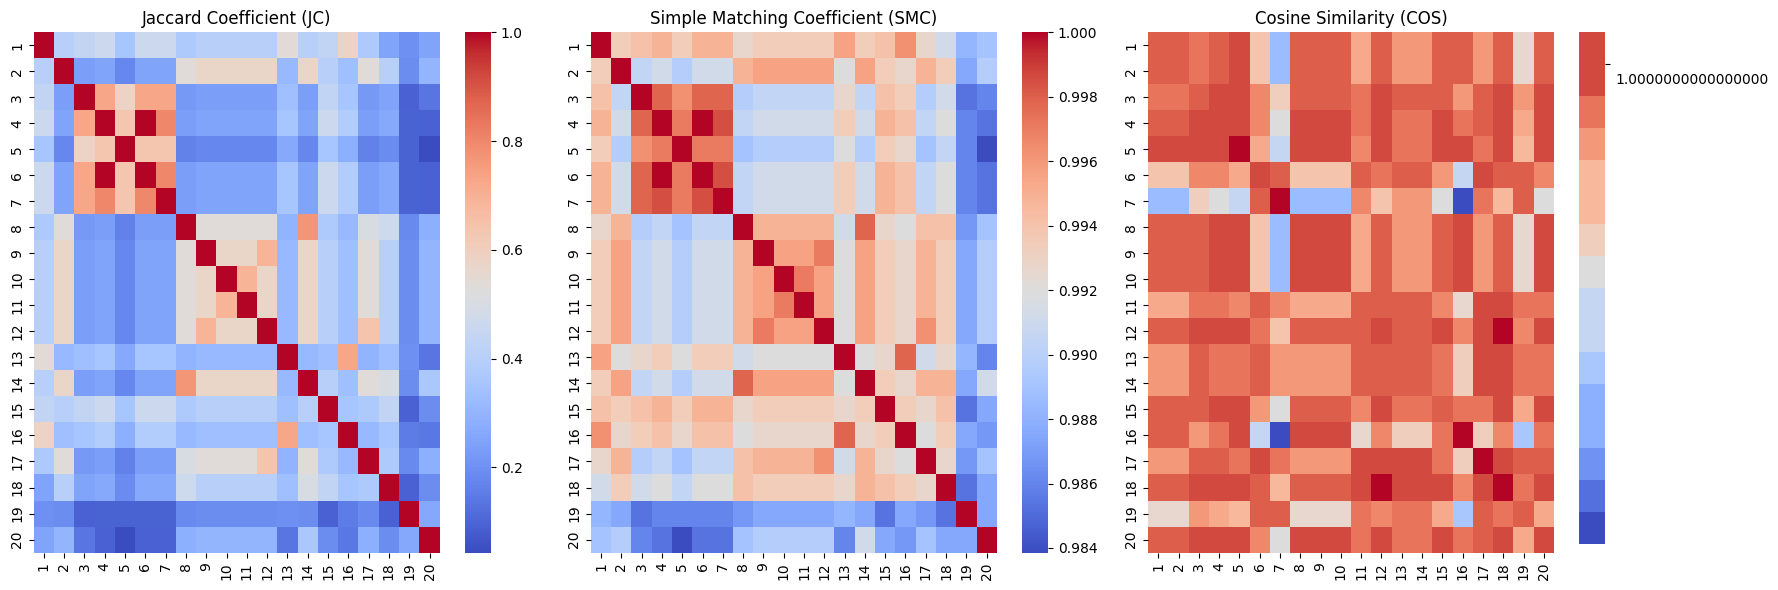

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

df_subset = df.iloc[:20]
binary_cols = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]
df_binary = df_subset[binary_cols].astype(int)

df_values = df_subset.to_numpy()

jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cos_matrix = cosine_similarity(df_values)

def compute_jc_smc(vec1, vec2):
    intersection = np.sum((vec1 == 1) & (vec2 == 1))
    union = np.sum((vec1 == 1) | (vec2 == 1))
    matches = np.sum(vec1 == vec2)
    total_attributes = len(vec1)

    jc = intersection / union if union != 0 else 0
    smc = matches / total_attributes
    return jc, smc

for i in range(20):
    for j in range(20):
        jc_matrix[i, j], smc_matrix[i, j] = compute_jc_smc(df_binary.iloc[i].values, df_binary.iloc[j].values)

jc_df = pd.DataFrame(jc_matrix, index=range(1, 21), columns=range(1, 21))
smc_df = pd.DataFrame(smc_matrix, index=range(1, 21), columns=range(1, 21))
cos_df = pd.DataFrame(cos_matrix, index=range(1, 21), columns=range(1, 21))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(jc_df, ax=axes[0], cmap="coolwarm", annot=False)
axes[0].set_title("Jaccard Coefficient (JC)")

sns.heatmap(smc_df, ax=axes[1], cmap="coolwarm", annot=False)
axes[1].set_title("Simple Matching Coefficient (SMC)")

sns.heatmap(cos_df, ax=axes[2], cmap="coolwarm", annot=False)
axes[2].set_title("Cosine Similarity (COS)")

plt.tight_layout()
plt.show()